In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-churn-prediction-2020/sampleSubmission.csv
/kaggle/input/customer-churn-prediction-2020/train.csv
/kaggle/input/customer-churn-prediction-2020/test.csv


# EDA

In [38]:
churn = pd.read_csv('/kaggle/input/customer-churn-prediction-2020/train.csv')

In [39]:
churn.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [40]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [41]:
churn.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


<AxesSubplot:xlabel='churn', ylabel='count'>

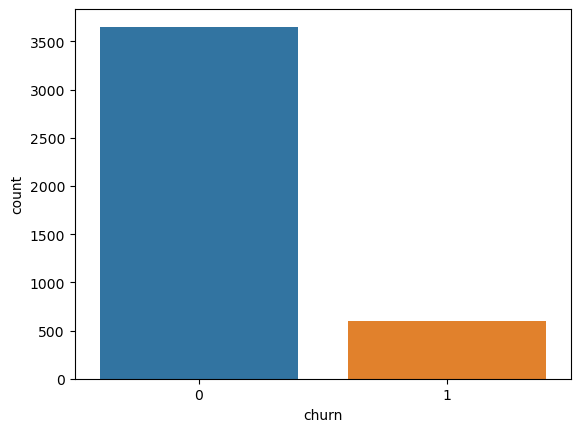

In [42]:
churn.churn=churn.churn.map({"no":0,"yes":1})
sns.countplot(x = churn.churn)

In [43]:
churn['international_plan']=churn['international_plan'].map({"no":0,"yes":1})
churn['voice_mail_plan']=churn['voice_mail_plan'].map({"no":0,"yes":1})

In [45]:
churn['total_calls'] = churn['total_day_calls'] + churn['total_eve_calls'] + churn['total_night_calls'] + churn['total_intl_calls']
churn['total_charges'] = churn['total_day_charge'] + churn['total_eve_charge'] + churn['total_night_charge'] + churn['total_intl_charge']
churn['total_mins'] = churn['total_day_minutes'] + churn['total_eve_minutes'] + churn['total_night_minutes'] + churn['total_intl_minutes']

# Feature Selection

In [46]:
def woe_discrete(df,discrete_var,good_bad_var):
    df = pd.concat([df[discrete_var],good_bad_var], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].sum(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count()], axis = 1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'n_good', 'n_obs']
    df['n_bad'] = df['n_obs'] - df['n_good']
    df['prop_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_good'] / df['prop_bad'])
    df['IV'] = ((df['prop_good'] - df['prop_bad']) * df['WoE']).sum()    
    df = df.sort_values('WoE', ascending = True) 
    df = df.reset_index(drop = True)
    return df

In [47]:
y = churn.churn

In [48]:
woe_discrete(churn,'area_code',y)

,area_code,n_good,n_obs,n_bad,prop_good,prop_bad,WoE,IV
0,area_code_415,287,2108,1821,0.479933,0.498631,-0.038219,0.002331
1,area_code_408,152,1086,934,0.254181,0.255750,-0.006156,0.002331
2,area_code_510,159,1056,897,0.265886,0.245619,0.079288,0.002331


In [49]:
woe_discrete(churn,'international_plan',y)

,international_plan,n_good,n_obs,n_bad,prop_good,prop_bad,WoE,IV
0,0,431,3854,3423,0.720736,0.937295,-0.262725,0.380372
1,1,167,396,229,0.279264,0.062705,1.493711,0.380372


In [50]:
woe_discrete(churn,'voice_mail_plan',y)

,voice_mail_plan,n_good,n_obs,n_bad,prop_good,prop_bad,WoE,IV
0,1,82,1112,1030,0.137124,0.282037,-0.721155,0.131148
1,0,516,3138,2622,0.862876,0.717963,0.183854,0.131148


In [52]:
woe_discrete(churn,'state',y)

,state,n_good,n_obs,n_bad,prop_good,prop_bad,WoE,IV
0,VA,5,100,95,0.008361,0.026013,-1.134999,0.176148
1,HI,4,77,73,0.006689,0.019989,-1.094726,0.176148
2,AK,4,61,57,0.006689,0.015608,-0.847317,0.176148
3,NE,5,73,68,0.008361,0.018620,-0.800630,0.176148
4,RI,6,87,81,0.010033,0.022180,-0.793250,0.176148
5,WI,7,94,87,0.011706,0.023823,-0.710558,0.176148
6,IL,6,79,73,0.010033,0.019989,-0.689260,0.176148
7,NC,7,80,73,0.011706,0.019989,-0.535110,0.176148
8,ND,6,67,61,0.010033,0.016703,-0.509675,0.176148
9,AZ,7,77,70,0.011706,0.019168,-0.493146,0.176148


In [53]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [56]:
make_mi_scores(churn.drop(['area_code','state','churn',],axis = 1), y)

total_charges                    0.105795
total_day_charge                 0.067208
total_day_minutes                0.063551
total_mins                       0.046045
international_plan               0.040378
number_customer_service_calls    0.031333
total_calls                      0.012935
total_intl_calls                 0.012493
voice_mail_plan                  0.012410
total_night_charge               0.012065
total_intl_charge                0.011813
total_night_calls                0.007762
total_day_calls                  0.006670
total_intl_minutes               0.006110
total_night_minutes              0.005819
number_vmail_messages            0.005763
total_eve_charge                 0.005164
total_eve_minutes                0.000670
account_length                   0.000547
total_eve_calls                  0.000000
Name: MI Scores, dtype: float64

In [58]:
x = churn[['total_charges','total_mins', 'number_customer_service_calls', 'state','international_plan', 'churn','voice_mail_plan', 'total_intl_charge','total_intl_minutes','total_intl_calls']]
x.head()

,total_charges,total_mins,number_customer_service_calls,state,international_plan,churn,voice_mail_plan,total_intl_charge,total_intl_minutes,total_intl_calls
0,59.24,625.2,1,OH,0,0,1,3.70,13.7,3
1,62.29,539.4,0,NJ,0,0,0,3.29,12.2,5
2,66.80,564.8,2,OH,1,0,0,1.78,6.6,7
3,52.09,512.0,3,OK,1,0,0,2.73,10.1,3
4,78.31,786.8,3,MA,0,0,1,2.03,7.5,7


# Model Training

In [59]:
# Function to call all Classification Algorithms
def classification_funct(dataset,column_to_be_studied):
    #importing Classification libraries
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier
    
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SMOTE
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
       
    # assign x and y, get dummies (sparse matrix - object to integer)
    dataset=dataset[dataset[column_to_be_studied].notnull()]
    x,y=dataset.drop(column_to_be_studied,axis=1),dataset[[column_to_be_studied]]    
    x=pd.get_dummies(x,drop_first=True)
    # Using SMOTE for oversampling imbalanced data
    sm = SMOTE(random_state=2)
    x, y = sm.fit_resample(x, y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
    
    # create dataframe with results
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [61]:
classification_funct(x, 'churn')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

,f1_score,recall_score,precision_score,accuracy_score
XGBClassifier,0.976242,0.964438,0.988338,0.977413
RandomForestClassifier,0.935925,0.924609,0.947522,0.939083
GaussianNB,0.877167,0.827881,0.932692,0.888433
DecisionTreeClassifier,0.880450,0.890469,0.870654,0.883641
BernoulliNB,0.865737,0.839260,0.893939,0.874743
KNeighborsClassifier,0.867142,0.951636,0.796429,0.859685
LogisticRegression,0.811321,0.856330,0.770807,0.808350
SVC,0.565492,0.445235,0.774752,0.670773


# Model Validation

In [62]:
from xgboost import XGBClassifier
XGB=XGBClassifier()

In [63]:
x.drop('churn', axis = 1, inplace = True)
x.columns

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['total_charges', 'total_mins', 'number_customer_service_calls', 'state',
       'international_plan', 'voice_mail_plan', 'total_intl_charge',
       'total_intl_minutes', 'total_intl_calls'],
      dtype='object')

In [64]:
x = pd.get_dummies(x, drop_first=True)
x.shape

(4250, 58)

In [65]:
XGB.fit(x,y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [66]:
churn = pd.read_csv('/kaggle/input/customer-churn-prediction-2020/test.csv')

In [67]:
churn['international_plan']=churn['international_plan'].map({"no":0,"yes":1})
churn['voice_mail_plan']=churn['voice_mail_plan'].map({"no":0,"yes":1})

In [68]:
churn['total_calls'] = churn['total_day_calls'] + churn['total_eve_calls'] + churn['total_night_calls'] + churn['total_intl_calls']
churn['total_charges'] = churn['total_day_charge'] + churn['total_eve_charge'] + churn['total_night_charge'] + churn['total_intl_charge']
churn['total_mins'] = churn['total_day_minutes'] + churn['total_eve_minutes'] + churn['total_night_minutes'] + churn['total_intl_minutes']

In [70]:
churn_x = churn[['total_charges','total_mins', 'number_customer_service_calls', 'state','international_plan','voice_mail_plan', 'total_intl_charge','total_intl_minutes','total_intl_calls']]
churn_x.columns

Index(['total_charges', 'total_mins', 'number_customer_service_calls', 'state',
       'international_plan', 'voice_mail_plan', 'total_intl_charge',
       'total_intl_minutes', 'total_intl_calls'],
      dtype='object')

In [76]:
churn_x= pd.get_dummies(churn_x,drop_first=True)

In [77]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

In [78]:
y_hat = XGB.predict(churn_x)

In [82]:
submission = pd.DataFrame({"id":churn.index, 'churn':y_hat})
submission.head()

,id,churn
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [84]:
submission.to_csv('submission.csv', index=False)